# Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the dataset

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# About the dataset:

- This is Titanic dataset used for this project to practise analysis and EDA using python.

- The dataset contains some intersting issues which make it a good practice.

- The columns are as follows:

    - 1. 'survived': A Binary column indicate whether the passenger survived of not (0: Dead, 1: Survived)
    - 2. 'pclass': The class passengers travelled in (numerical)
    - 3. 'sex': Gender of the passenger
    - 4. 'age': Age of the passsenger
    - 5. 'sibsp': Number of siblings/spouse with the passenger
    - 6. 'parch': Number of parent/children with the passenger  
    - 7. 'Fare': Amount paid for the ticket
    - 8. 'Embarked': Indicated where the passenger boarded the ship
    - 9. 'class': The class passengers travelled in (categorical)
    - 10. 'who': indicate gender identity for the passengers (man,woman,child)
    - 11. 'deck': passenger deck of residence
    - 12. 'embark_town': name of the city where the passenger boarded the ship
    - 13. 'alive': indicate whether the passenger survived or not (categorical)
    - 14. 'alone': indicate whether the passenger was alone on the ship or not (bool) 

# General Questions

- 1. Is there any missing values in the data?
- 2. Is there any duplicates in the data?
- 3. Is there any inconsistent format/datatype in each column?
- 4. Is there any irrelevant columns in this data?
- 5. what is the number of unique values in each column?
- 6. how many values are there in this data in each column?
- 7. Is there any outliers in the data?


# Special Questions:
- 1. How many male and female are survived?
- 2. What is Survival distribution of the data?
- 3. how many men,women and children survived from the ship?
- 4. What is the average survival age of the passengers?
- 5. Is there any trend or relationsip in the data between age and survival?
- 6. Does the survivor was alone on the ship or not on the ship?
- 7. Does the class of the passenger affect their survival?
- 8. Does thier embark affect their survival?

# Explore the data

In [3]:
df.shape

(891, 15)

In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**Check for Missing values**

In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Check for Duplicates**

In [7]:
df.duplicated().sum()

107

**Show statistical info about the data**

In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [10]:
df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [11]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [12]:
def count(col):
    return df[col].value_counts()

columns=df.columns
for column in columns:
    print(f'values in column {column} is:{count(column)}')
    print('-------------------------------------')

values in column survived is:survived
0    549
1    342
Name: count, dtype: int64
-------------------------------------
values in column pclass is:pclass
3    491
1    216
2    184
Name: count, dtype: int64
-------------------------------------
values in column sex is:sex
male      577
female    314
Name: count, dtype: int64
-------------------------------------
values in column age is:age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
-------------------------------------
values in column sibsp is:sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
-------------------------------------
values in column parch is:parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
-------------------------------------
values in column fare is:fare
8.0500     43
13.0000    42
7.8958     38
7.7500   

**Check for outliers**

In [13]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

There are NaN, values below 1 year, and values up to 80 year

we should investigate these values before deciding what to do with them

<Axes: ylabel='age'>

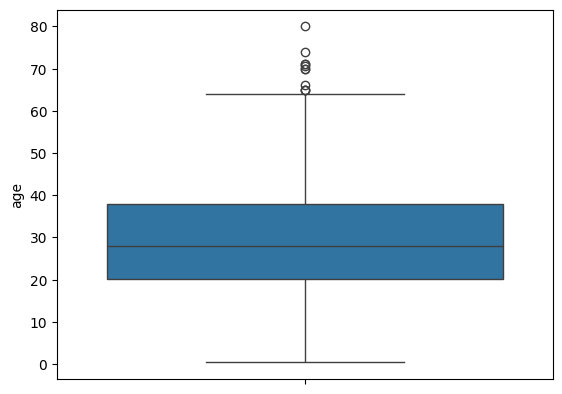

In [14]:
sns.boxplot(df['age'])

The box plot shows us that the outliers considered nearly in the range of 65 years and above

Let's see it in our data!

In [15]:
df[df['age']>=65]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


There are many elderly people who died in the data,but there is one survivor in our data, A man with 80 years old!

Let's investigate the reasons behind this behavior

# Our investigation will be as follows:
First explore each column to discover pattern and solve issues to make it clean
then investigate Age column
- Divide Age column into 3 parts
    - people above 60 (I raised the range for better investigation) (60,80) -> elderly people
    - people below 1 and below 16 (1,15) -> children
    - people above 16 and below 59 (16,59) -> youth
    
- Then we will examine these factors:
    - Does all Female survive and all Male die or vice versa?
    - Does embark town of these people affect there survival?
    - Does their class on the ship saves their lifes?
    - Does travelling with you family affect thier survival

In [16]:
df[df['age']<=1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
164,0,3,male,1.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
183,1,2,male,1.00,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
381,1,3,female,1.00,0,2,15.7417,C,Third,child,False,NaN,Cherbourg,yes,False
386,0,3,male,1.00,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False


most of the children below 1 year were survived

Text(0.5, 1.0, 'Age Distribution')

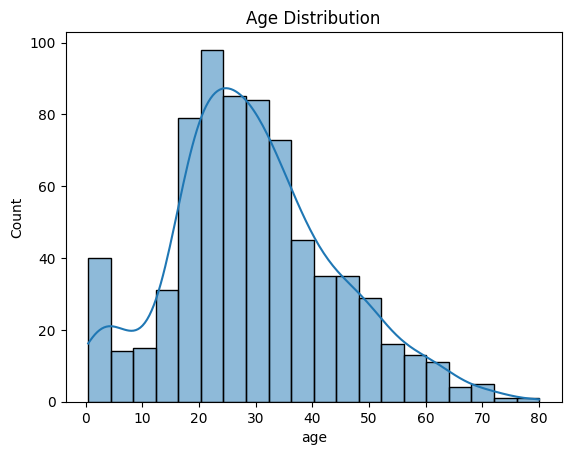

In [17]:
sns.histplot(data=df,x='age',kde=True)
plt.title('Age Distribution')

The data contains:

    - Missing values: in age,embarked,embarked_town and deck

    - Duplicates

    - irrelevant column: deck -> should be dropped, we try to impute it using class but it doesn't work :(
    
    - investigate Age column


#### solving second and third issues before visualization 

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [19]:
df.drop(columns=['deck'],axis=1,inplace=True)
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

### Univariate Analysis

##### Survival Distribution 

In [20]:
# The proportions are close 
df['survived'].value_counts()

survived
0    461
1    323
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Distribution')

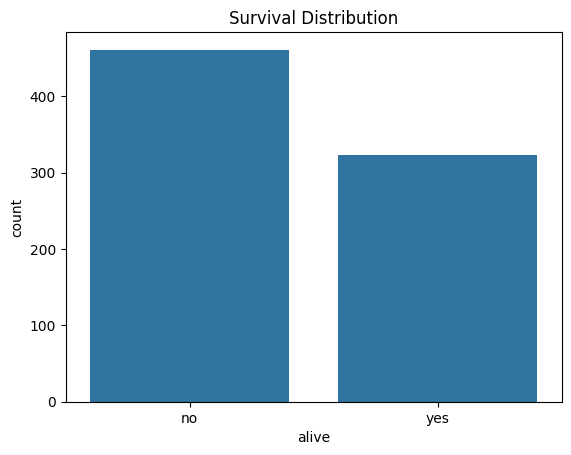

In [21]:
sns.countplot(x='alive',data=df)
plt.title('Survival Distribution')

##### Gender identity Distribution and demographics

In [22]:
# male are more than female in this data
df['sex'].value_counts()/df['sex'].shape[0]*100

sex
male      62.627551
female    37.372449
Name: count, dtype: float64

In [23]:
# as we see men are more the women and children, we must see if they survive
df['who'].value_counts()

who
man      451
woman    251
child     82
Name: count, dtype: int64

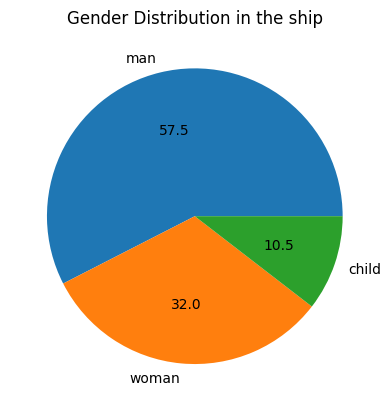

In [24]:
plt.pie(x=df['who'].value_counts(),labels=df['who'].unique(),autopct='%0.1f')
plt.title('Gender Distribution in the ship')
plt.show()

#### Class Disribution

Text(0.5, 1.0, 'Class Disribution')

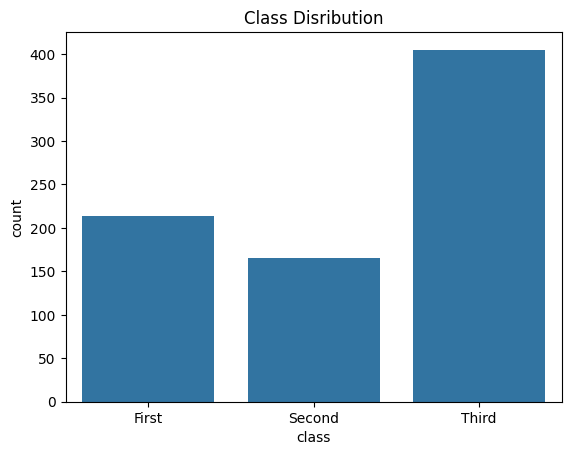

In [25]:
# most of the ship were 3rd class, must know if they survive
sns.countplot(data=df,x='class')
plt.title('Class Disribution')

## Bivariate Analysis

### Gender Survival Distribution

Text(0, 0.5, 'freq')

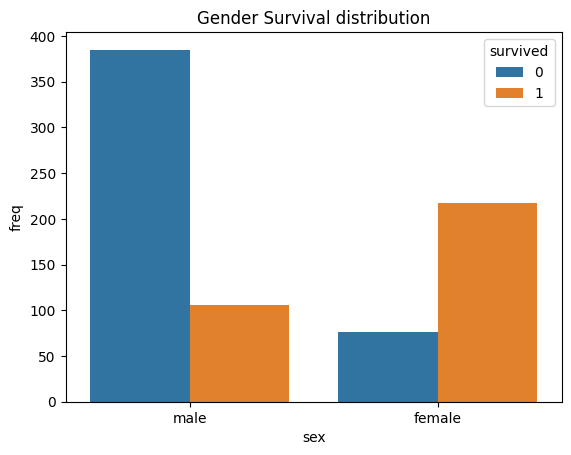

In [26]:
sns.countplot(data=df,x='sex',hue='survived')
plt.title('Gender Survival distribution')
plt.ylabel('freq')

most of Male (men and children) on the ship were died unlike Female (women and children) most of them survived

### Age Group distribution

In [27]:
df[['who','alive']].value_counts()

who    alive
man    no       366
woman  yes      190
man    yes       85
woman  no        61
child  yes       48
       no        34
Name: count, dtype: int64

Text(0, 0.5, 'freq')

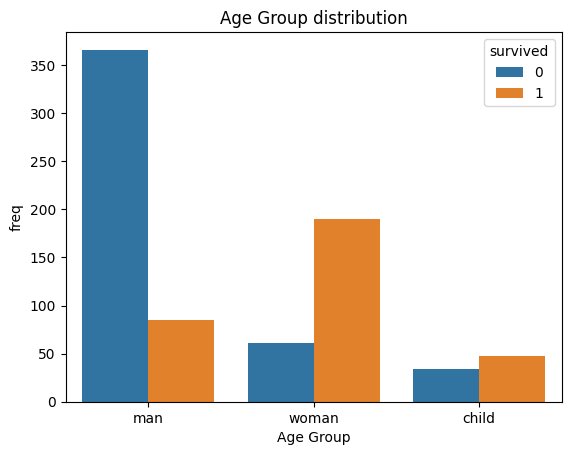

In [28]:
sns.countplot(data=df,x='who',hue='survived')
plt.title('Age Group distribution')
plt.xlabel('Age Group')
plt.ylabel('freq')

This plot also indicated that men died more than women and ratio of children being survived is slightly above the ration of being died

In [29]:
df[['who','alive','sex']][df['who']=='child'].value_counts()

who    alive  sex   
child  yes    female    27
              male      21
       no     male      19
              female    15
Name: count, dtype: int64

Here also, we find the more Female children are survived more than male children, 
also male child died more than female child 

In [30]:
# average age survival
avg_age=df.groupby('survived')['age'].agg('mean')
print('average age survival=',avg_age)

average age survival= survived
0    30.953046
1    28.365915
Name: age, dtype: float64


Handle missing values

In [31]:
# we choose median as we have here outliers
age_group=df.groupby('who')['age'].agg('median')
table=pd.DataFrame(age_group).reset_index()
table

,who,age
0,child,5.0
1,man,31.0
2,woman,30.0


In [32]:
age_dict = dict(zip(table['who'], table['age']))

# Fill NaN in df['age'] using mapping from 'who'
df['age'] = df['age'].fillna(df['who'].map(age_dict))
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 31.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 30.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

#### Survival by Age Distribution

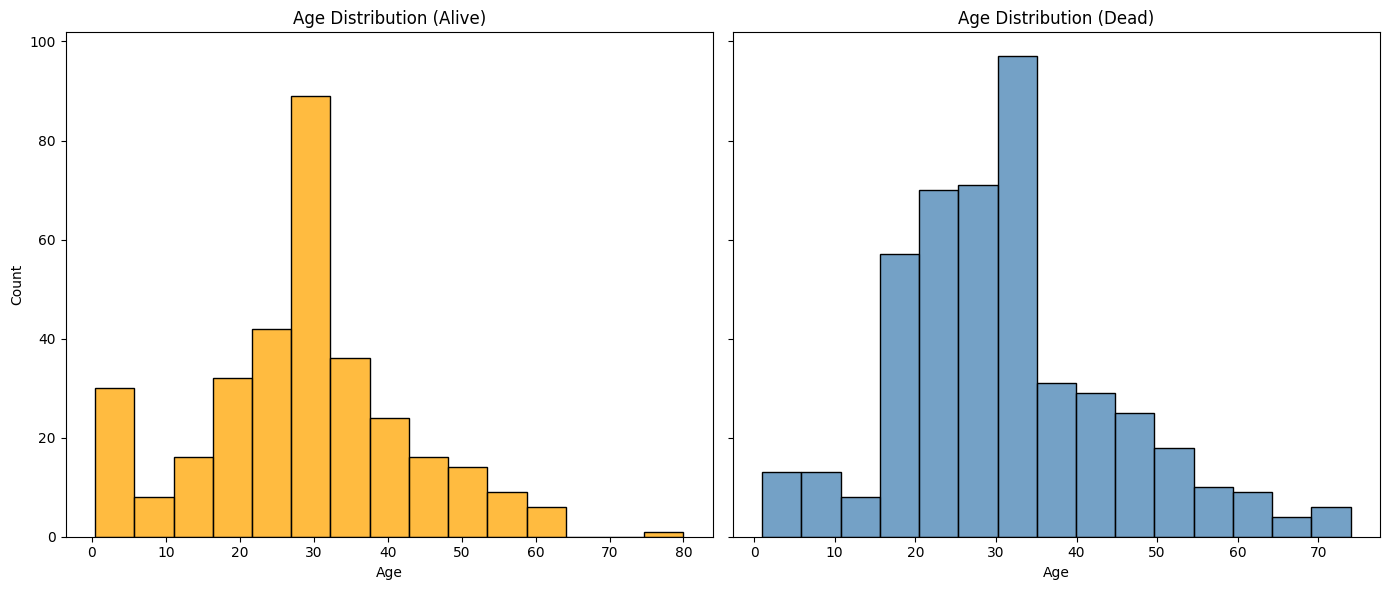

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(
    data=df[df['alive'] == 'yes'],
    x='age',
    bins=15,
    kde=False,
    color='orange',
    ax=axes[0]
)
axes[0].set_title('Age Distribution (Alive)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.histplot(
    data=df[df['alive'] == 'no'],
    x='age',
    bins=15,
    kde=False,
    color='steelblue',
    ax=axes[1]
)
axes[1].set_title('Age Distribution (Dead)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Survival Rate Per class

In [34]:
df['class'].value_counts()

class
Third     405
First     214
Second    165
Name: count, dtype: int64

Third class was the most class on the ship

Text(0.5, 1.0, 'Survival Rate Per Class')

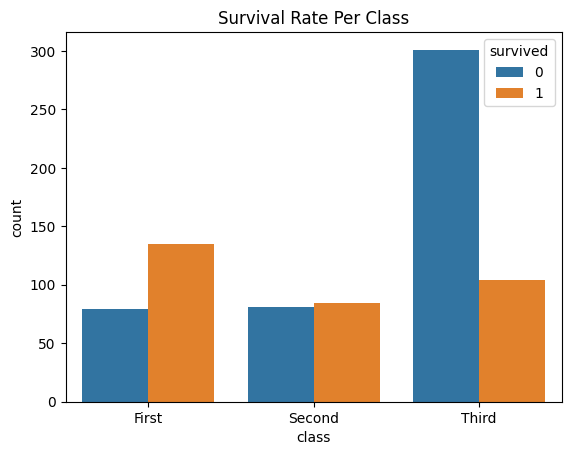

In [35]:
sns.countplot(data=df,x='class',hue='survived')
plt.title('Survival Rate Per Class')

In [36]:
df[['class','alive']].value_counts()

class   alive
Third   no       301
First   yes      135
Third   yes      104
Second  yes       84
        no        81
First   no        79
Name: count, dtype: int64

most people in the Third class was dead, while most people in the first class were survived

Does this mean that the class affect their survive or the distribution of sex in the classes affect also?

Recall: male has the highest number in death unlike female

In [37]:
df.groupby(['class','sex','alive'])['alive'].agg('count')

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\3363896592.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['class','sex','alive'])['alive'].agg('count')


class   sex     alive
First   female  no         3
                yes       90
        male    no        76
                yes       45
Second  female  no         6
                yes       67
        male    no        75
                yes       17
Third   female  no        67
                yes       60
        male    no       234
                yes       44
Name: alive, dtype: int64

That means:

Male has the most percentage in death regardless the class, 
Female has the most percentage in survival but if we take class into consideration

being in the first class raise the probability of survival unlike second and third class (as well as in men although it's very low)

**Visualize the distribution**

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\818846506.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sub=df.groupby(['class','sex','alive']).size().reset_index(name='count')


Text(0.5, 0.98, 'Passenger Survival Count by Gender and Class')

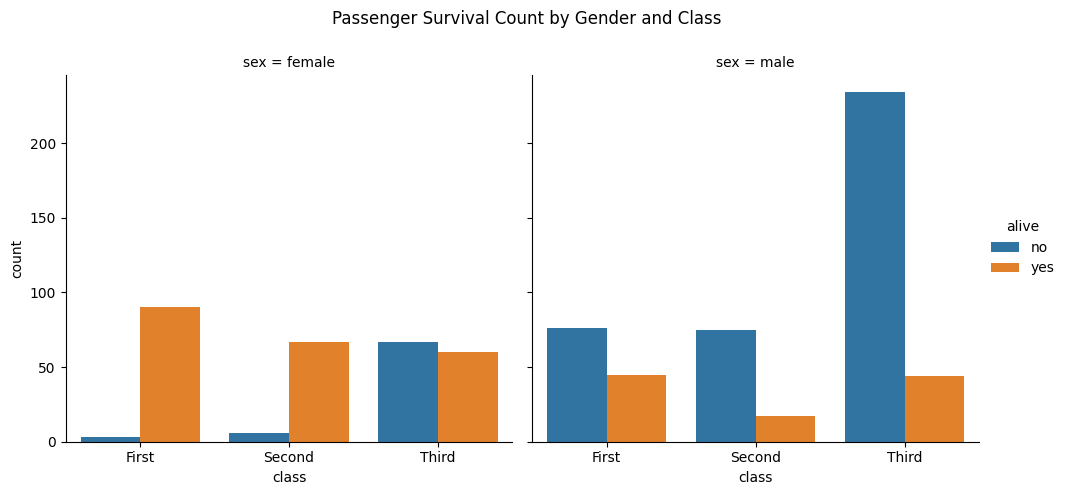

In [38]:
df_sub=df.groupby(['class','sex','alive']).size().reset_index(name='count')
sns.catplot(
    data=df_sub,
    kind='bar',
    x='class',
    y='count',
    hue='alive',
    col='sex',
    height=5,
    aspect=1
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Passenger Survival Count by Gender and Class')

### Embark Distribution

In [39]:
df['embark_town'].value_counts()

embark_town
Southampton    568
Cherbourg      155
Queenstown      59
Name: count, dtype: int64

as Southampton was the start of the journey, the ship has most number of passengers from it

as Queenstown was the last stop of the journey, the ship has least number of passengers from it

Text(0.5, 0, 'Count')

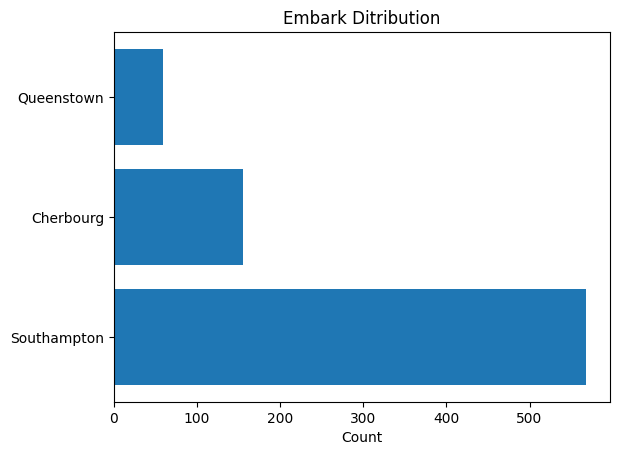

In [40]:
plt.barh(y=df['embark_town'].value_counts().index,
         width=df['embark_town'].value_counts().values)
plt.title('Embark Ditribution')
plt.xlabel('Count')

## Multivariate Analysis

Drop Missing Values For Embark_town and Embarked Columns (only two rows)

In [41]:
df.dropna(subset=['embark_town','embarked'],inplace=True)
df[['embarked','embark_town']].isna().sum()

embarked       0
embark_town    0
dtype: int64

### Survival Rate Per Embark_Town and Class

In [42]:
df[['embark_town','survived']].value_counts()

embark_town  survived
Southampton  0           357
             1           211
Cherbourg    1            90
             0            65
Queenstown   0            39
             1            20
Name: count, dtype: int64

Southampton has the highest percentage of death rate, also the other two stops has significant number of deaths

but does it affected by class or sex?

Let's see!

In [43]:
df.groupby(['embark_town','class','alive'])['alive'].agg('count')

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\1702465486.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['embark_town','class','alive'])['alive'].agg('count')


embark_town  class   alive
Cherbourg    First   no        25
                     yes       58
             Second  no         8
                     yes        9
             Third   no        32
                     yes       23
Queenstown   First   no         1
                     yes        1
             Second  no         1
                     yes        2
             Third   no        37
                     yes       17
Southampton  First   no        53
                     yes       74
             Second  no        72
                     yes       73
             Third   no       232
                     yes       64
Name: alive, dtype: int64

Southampton has the highest number of deaths in third class and a siginificant number of survivals in the first class

Queenstown has the highest number of deaths in the third class (as number of passengers in the other 2 classes is very small we cannot indicate if it has higher chance in survival or not)

Cherbourg has the highest number of survival in the first class and a significant number of deaths and survival in the third class and almost 50% of survivals in the second class (does it related to sex or not? Let's see!)

In [44]:
df[['class','sex','alive']][df['embark_town']=='Cherbourg'].value_counts()

class   sex     alive
First   female  yes      41
        male    no       24
Third   male    no       24
First   male    yes      17
Third   female  yes      14
        male    yes       9
Second  male    no        8
Third   female  no        8
Second  female  yes       7
        male    yes       2
First   female  no        1
Name: count, dtype: int64

most of the deaths in the third class was male and most survivals was female

all of the deaths in the second class was male and most survivals was female

most of the deaths in the first class was male and most survivals was female and a significant number of male

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\457220269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sub=df.groupby(['embark_town','class','who']).size().reset_index(name='count')


Text(0.5, 0.98, 'Passenger Gender Distribution by Embark Town and Class')

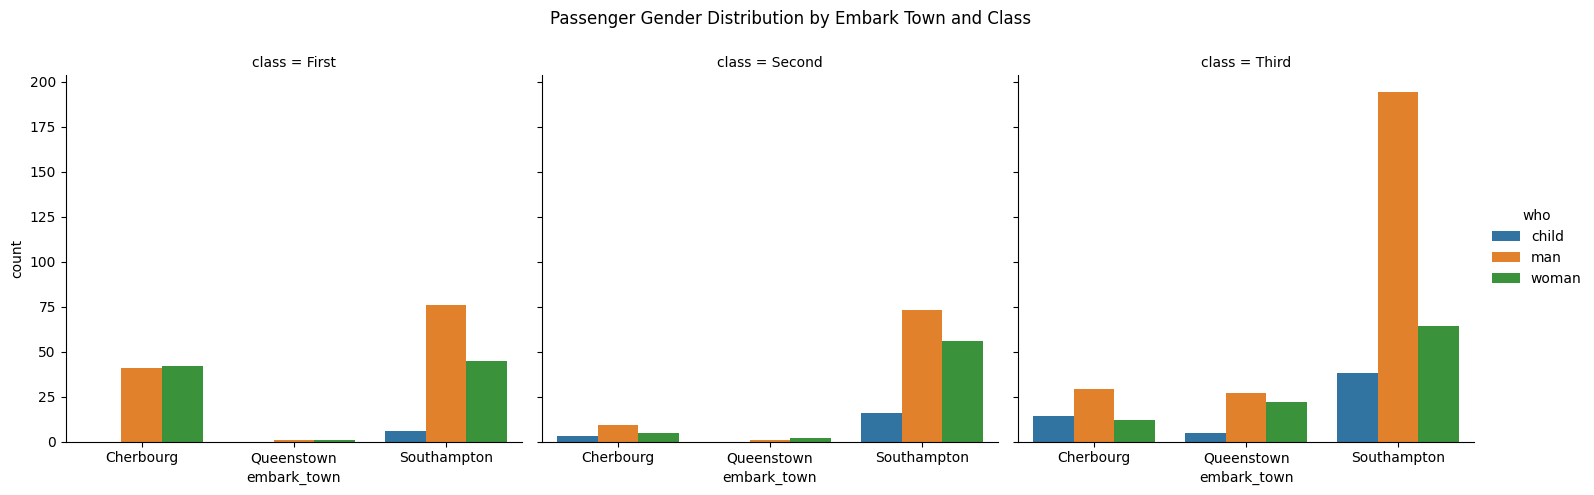

In [45]:
df_sub=df.groupby(['embark_town','class','who']).size().reset_index(name='count')
sns.catplot(
    data=df_sub,
    kind='bar',
    x='embark_town',
    y='count',
    hue='who',
    col='class',
    height=5,
    aspect=1
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Passenger Gender Distribution by Embark Town and Class')

C:\Users\Dell\AppData\Local\Temp\ipykernel_23432\4058219550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sub2=df.groupby(['embark_town','class','alive']).size().reset_index(name='count')


Text(0.5, 0.98, 'Passenger Survival Count by Embark Town and Class')

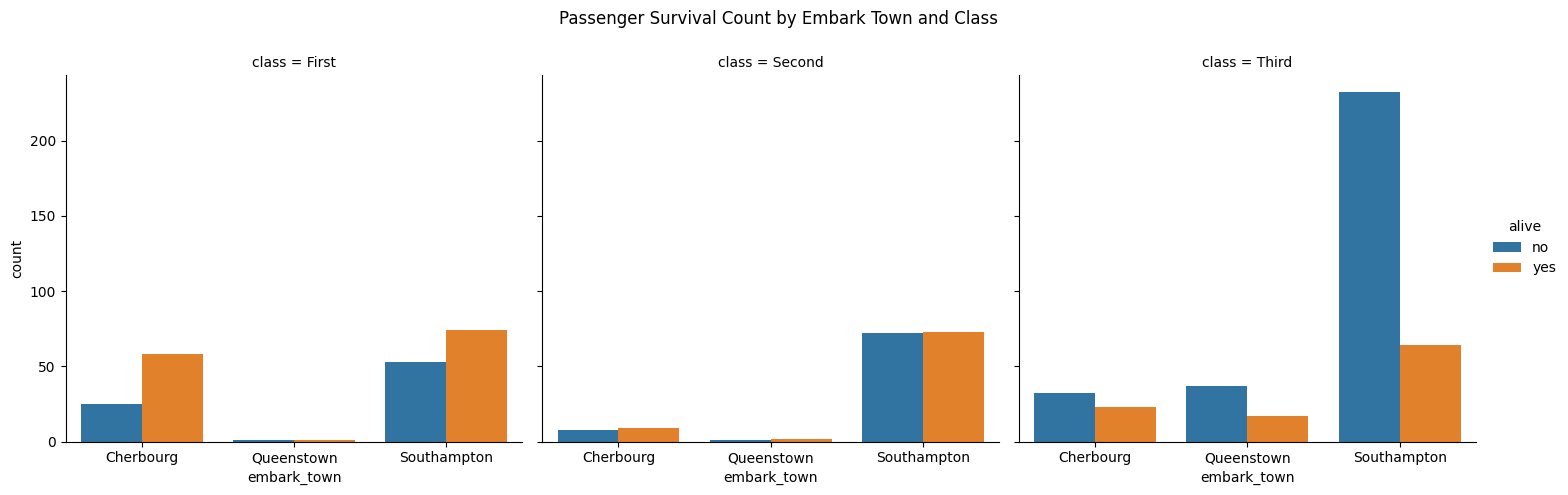

In [46]:
df_sub2=df.groupby(['embark_town','class','alive']).size().reset_index(name='count')
sns.catplot(
    data=df_sub2,
    kind='bar',
    x='embark_town',
    y='count',
    hue='alive',
    col='class',
    height=5,
    aspect=1
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Passenger Survival Count by Embark Town and Class')

Let's investigate death and survivals with family members (sibsp,parch)

In [47]:
print(df['sibsp'].value_counts())
print(df['parch'].value_counts())

sibsp
0    515
1    201
2     27
4     18
3     14
5      5
8      2
Name: count, dtype: int64
parch
0    578
1    114
2     75
5      5
3      5
4      4
6      1
Name: count, dtype: int64


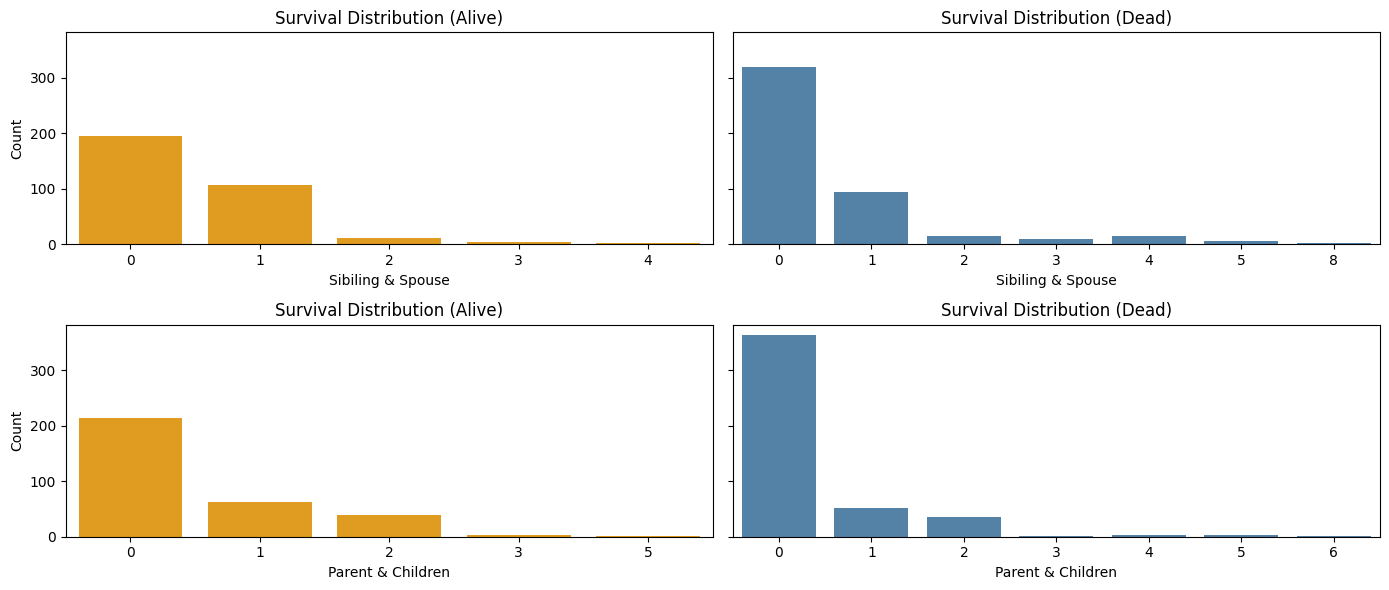

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6), sharey=True)
axes = axes.flatten()

sns.countplot(
    data=df[df['alive'] == 'yes'],
    x='sibsp',
    color='orange',
    ax=axes[0]
)
axes[0].set_title('Survival Distribution (Alive)')
axes[0].set_xlabel('Sibiling & Spouse')
axes[0].set_ylabel('Count')

sns.countplot(
    data=df[df['alive'] == 'no'],
    x='sibsp',
    color='steelblue',
    ax=axes[1]
)
axes[1].set_title('Survival Distribution (Dead)')
axes[1].set_xlabel('Sibiling & Spouse')
axes[1].set_ylabel('Count')

sns.countplot(
    data=df[df['alive'] == 'yes'],
    x='parch',
    color='orange',
    ax=axes[2]
)
axes[2].set_title('Survival Distribution (Alive)')
axes[2].set_xlabel('Parent & Children')
axes[2].set_ylabel('Count')

sns.countplot(
    data=df[df['alive'] == 'no'],
    x='parch',
    color='steelblue',
    ax=axes[3]
)
axes[3].set_title('Survival Distribution (Dead)')
axes[3].set_xlabel('Parent & Children')
axes[3].set_ylabel('Count')
plt.tight_layout()
plt.show()


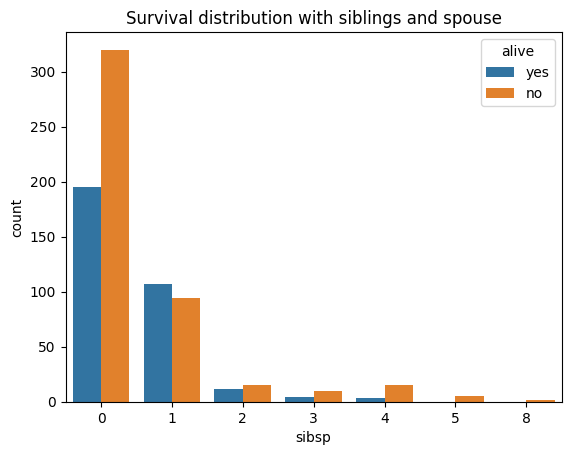

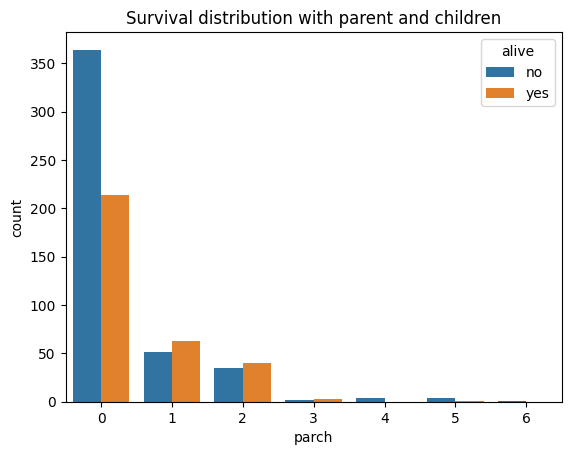

In [49]:
sns.countplot(data=df,x='sibsp',hue='alive')
plt.title('Survival distribution with siblings and spouse')
plt.show()

sns.countplot(data=df,x='parch',hue='alive')
plt.title('Survival distribution with parent and children')
plt.show()

most of deaths were with sigular individuals (with no parent,siblings, children, or spouse) and with a significant number of survivals but increasing number in family members the survival rate tend to disappear as they take care of many members

**Let's look at Age column**

- detect outliers

In [50]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower Bound:',lower_bound)
print('Upper Bound:',upper_bound)

Lower Bound: 1.0
Upper Bound: 57.0


Let's look at this bounds

In [51]:
df[df['age']<lower_bound]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,Southampton,yes,False
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,Southampton,yes,False


all members below lower bound are survived which we couldn't filter it out

In [52]:
df[df['age']> upper_bound]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,Southampton,yes,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,Cherbourg,no,False
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,Queenstown,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,Southampton,no,True
195,1,1,female,58.0,0,0,146.5208,C,First,woman,False,Cherbourg,yes,True
232,0,2,male,59.0,0,0,13.5000,S,Second,man,True,Southampton,no,True
252,0,1,male,62.0,0,0,26.5500,S,First,man,True,Southampton,no,True


as we see above and here there are elderly people who survived on the ship that also we shouldn't ignore, so we will not filter it out

**Let's figure age group as we mentioned above**

Text(0.5, 1.0, 'Children Survival distribution')

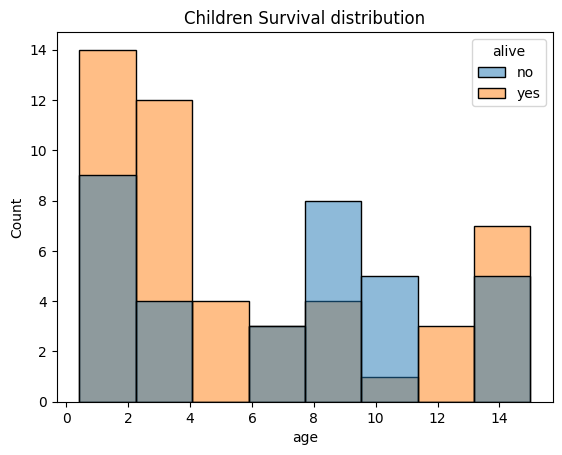

In [53]:
# ranges from below 1 to 15
sns.histplot(data=df[df['who']=='child'],x='age',hue='alive')
plt.title('Children Survival distribution')

most of children survived (a priority in the ship) except children from 8 to 10 years old with the most number of deaths 

In [54]:
df[['who','alive']][df['who']=='child'].value_counts()

who    alive
child  yes      48
       no       34
Name: count, dtype: int64

In [55]:
df[df['age']>=60]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,Queenstown,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,Southampton,no,True
252,0,1,male,62.0,0,0,26.5500,S,First,man,True,Southampton,no,True
275,1,1,female,63.0,1,0,77.9583,S,First,woman,False,Southampton,yes,False
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,Queenstown,no,True
326,0,3,male,61.0,0,0,6.2375,S,Third,man,True,Southampton,no,True
366,1,1,female,60.0,1,0,75.2500,C,First,woman,False,Cherbourg,yes,False


most of elderly people were men (most number of deaths)

Text(0.5, 1.0, 'Elderly people survival distribution')

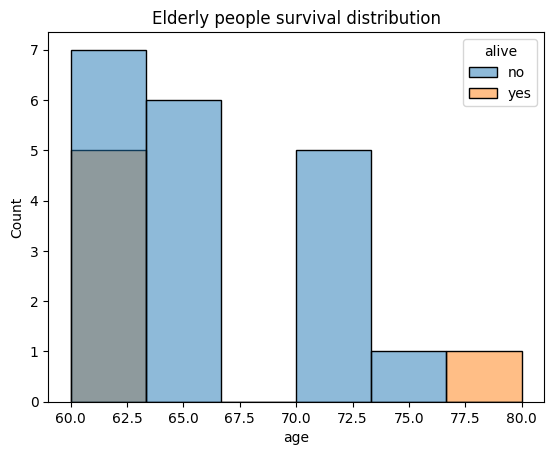

In [56]:
sns.histplot(data=df[df['age']>=60],x='age',hue='alive')
plt.title('Elderly people survival distribution')

most of elderly people are dead (as they are old and men), also we have a gap in the plot as ages from 66 to 70 isn't recorded in the data 

In [57]:
df[(df['age']>=16 )& (df['age']<60)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Text(0.5, 1.0, 'Youth survival distribution')

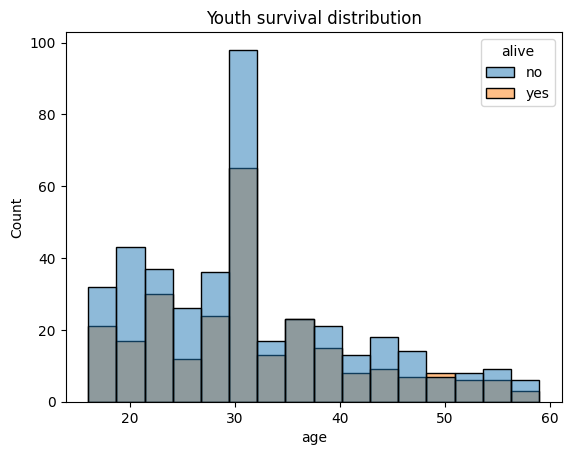

In [58]:
sns.histplot(data=df[(df['age']>=16 )& (df['age']<60)],x='age',hue='alive')
plt.title('Youth survival distribution')

most of youth has been died

**Let's finish with pair plot and heatmap**

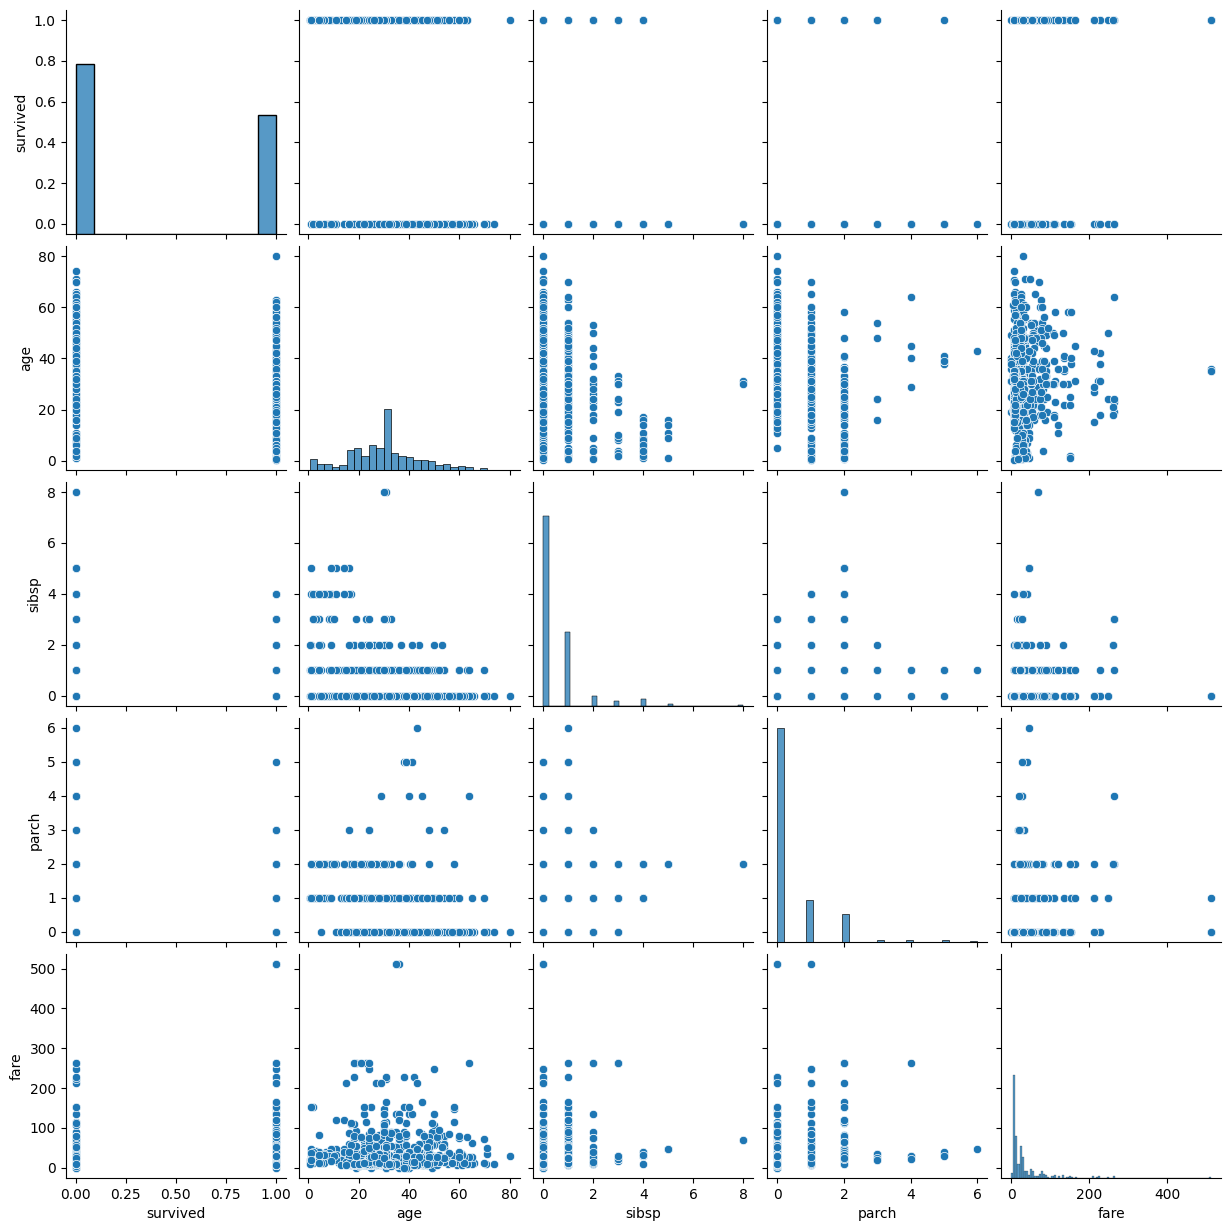

In [59]:
df_subset=df[['survived', 'age', 'sibsp', 'parch', 'fare','embarked']]
sns.pairplot(df_subset,diag_kind='hist')

<Axes: >

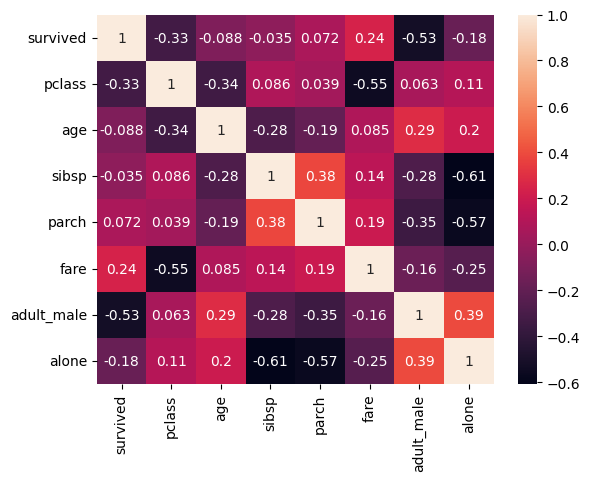

In [60]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Final Insights:
- female has the most survival percentage (women and children); may be they were the priority on the ship, also being in first class increase survival percentage in female

- male has the least survival percentage on the ship (They might have sacrificed themselves for others), also being in first class increase survival percentage in male -even if a little bit

- also deaths according to embarked town, also according to sex adn class, as we mention above

- increasing number of family members, deacresing survival percentage for the individual significantly -it doesn't mean that being alone ensure that you are safe :( as we see previously-

- most deaths were in young people (might have sacrificed themselves for others) and Elderly people (may be because of their age)

**Feedback Please :)**